## Evaluación de Modelos

In [2]:
# Imports for python 2/3 compatibility

from __future__ import absolute_import, division, print_function, unicode_literals

# For python 2, comment these out:
# from builtins import range

### Métricas de Evaluación

* <b>Matriz de Confusión</b> - Una matríz de confusión sirve para inspeccionar de manera visual la calidad de las predicciones de un clasificador. (Más información [acá](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)) - Muy útil para visualizar si una clase en la variable objetivo es particularmente problemática con respecto a las otras.

<b>A continuación procesaremos algunos datos y los clasificaremos usando SVM (Máquina de Soporte Vectorial. Más info [acá](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)), y de esta manera visualizar la calidad de la clasificación utilizando una matriz de confusión.</b>

In [3]:
import pandas as pd
import numpy as np

# Importar el modelo, algoritmos y datos
from sklearn import svm, datasets

# Importar el splitter
from sklearn.model_selection import train_test_split

# Importar las métricas
from sklearn.metrics import confusion_matrix

# Obtener datos (X) y etiquetas (y)
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Generar grupo de entrenamiento y prueba
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [4]:
# Ejecutar clasificación y generar una predicción sobre el conjunto de prueba
clf = svm.SVC(kernel = 'linear', C = 0.01)
y_pred = clf.fit(X_train, y_train).predict(X_test)

pd.DataFrame({'Prediction': iris.target_names[y_pred],
    'Actual': iris.target_names[y_test]})

,Prediction,Actual
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,virginica,versicolor
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,versicolor,versicolor
9,versicolor,versicolor


In [5]:
# Score de precisión
clf.score(X_test, y_test)

0.9777777777777777

In [6]:
# Esta es una función de ayuda que permite visualizar de manera más atractiva la matriz de confusión 
#  (from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, target_names, title = 'The Confusion Matrix', cmap = plt.cm.YlOrRd):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.tight_layout()
    
    # Add feature labels to x and y axes
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.colorbar()

Interpretando los valores en la matriz de confusión:
* **Sobre la diagonal**: Conteo de muestras cuya etiqueta estimada es igual a la etiqueta real - estimaciones correctas para esa etiqueta.
* **Fuera de la diagonal**: Conteo de muestras erroneamente etiquetas:

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


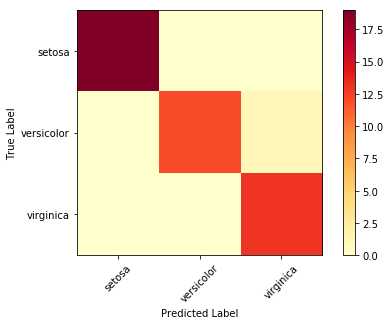

In [7]:
%matplotlib inline

# La matriz de confusión recibe como entrada las etiquetas correctas, y las etiquetas estimadas:
cm = confusion_matrix(y_test, y_pred)

# Ver los conteos
print(cm)

# Usar la función de ayuda para visualizar matriz:
plot_confusion_matrix(cm, iris.target_names)

* <b>Reporte de Clasificación</b> - Consiste en un reporte textual con una colección de métricas importantes para evaluar la clasificación (por ejemplo, precision, recall, etc)

In [12]:
from sklearn.metrics import classification_report

# Usando los datos vistos arriba
print(classification_report(y_test, y_pred, target_names = iris.target_names))

             precision    recall  f1-score   support

     setosa       0.50      0.33      0.40         3
 versicolor       1.00      1.00      1.00         1
  virginica       0.33      0.50      0.40         2

avg / total       0.53      0.50      0.50         6



In [11]:
# Ejemplo básico con información de prueba

y_test = ['cat', 'dog', 'mouse', 'mouse', 'cat', 'cat']
y_pred = ['mouse', 'dog', 'cat', 'mouse', 'cat', 'mouse']

# Cómo se comportó nuestro clasificador imaginario?
print(classification_report(y_test, y_pred, target_names = ['mouse', 'dog', 'cat']))

             precision    recall  f1-score   support

      mouse       0.50      0.33      0.40         3
        dog       1.00      1.00      1.00         1
        cat       0.33      0.50      0.40         2

avg / total       0.53      0.50      0.50         6



### Evaluación de Modelos y Under/Over-Fitting
* Los conceptos de over-fitting o under-fitting se refieren a cuando un modelo es aprende muy especificamente a partir de las muestras de entrenamiento, de tal forma que es muy bueno estimando esas muestras, pero no ninguna nueva (overfitting), y a cuando por lo contrario, generaliza demasiado y provee respuestas demasiado generales con poca precisión.  Puede visualizarse de la siguiente manera:


<img src='imgs/over_under.png' alt="Smiley face" width="950">

### Ejemplo

Podemos utilizar regresión polinomial para ilustrar estos problemas, debido a que en este enfoque, el utilizar polinomios de grados altos puede generar mucha fluctuación en el modelo. Más información [acá](https://www.jeremyjordan.me/polynomial-regression/).

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]


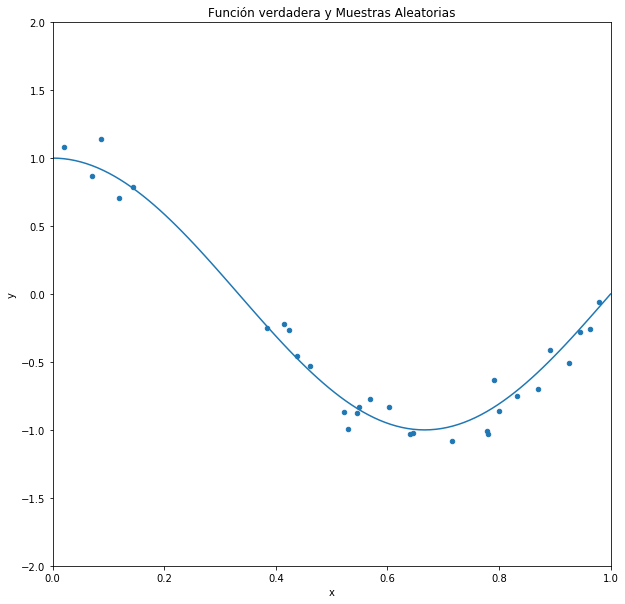

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# la verdadera función que queremos aproximar

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# Generamos 30 muestras aleatorias:
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

print(X)

# Grafiquemos la función y las muestras:
plt.figure(figsize=(10, 10))
plt.plot(X_test, true_fun(X_test))

plt.scatter(X, y, s=20)
plt.xlabel("x")
plt.ylabel("y")

plt.xlim((0, 1))
plt.ylim((-2, 2))

plt.title("Función verdadera y Muestras Aleatorias")
plt.show()

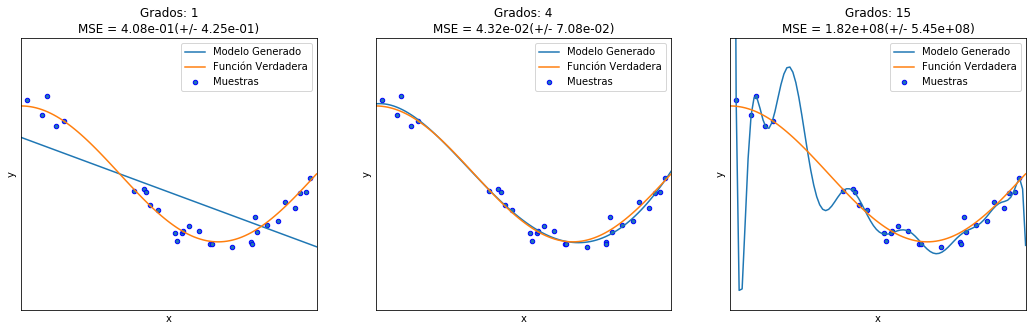

In [48]:
# Definimos 3 grados de ajuste para PolynomialFeatures:
degrees = [1, 4, 15]

plt.figure(figsize=(18, 5))

# Para cada grado de ajuste:
for i in range(len(degrees)):
    
    # Graficamos las muestras:
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Creamos nuevos features en la regresión usando máximo N grados:
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    
    # Regresión lineal usando features polinomiales:
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluamos el modelo usando kfold cross-validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    # Graficamos resultado
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo Generado")
    plt.plot(X_test, true_fun(X_test), label="Función Verdadera")
    plt.scatter(X, y, edgecolor='b', s=20, label="Muestras")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Grados: {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Práctica:

Investigue uno de los siguientes algoritmos de clasificación supervisada, y aplíquelo al conjunto de datos provisto. Genere un Jupyter Notebook con la información recolectada y la implementación del algoritmo, así como sus resultados:

### SVC (Support Vector Classification)

**Dataset**: titanic.csv

**Recursos**
* http://scikit-learn.org/stable/modules/svm.html#classification
* http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
* https://en.wikipedia.org/wiki/Support_vector_machine
* https://sadanand-singh.github.io/posts/svmpython/


### Lasso Regression

**Dataset**: sklearn.datasets.load_boston

**Recursos**
* http://scikit-learn.org/stable/modules/linear_model.html#lasso
* https://codingstartups.com/practical-machine-learning-ridge-regression-vs-lasso/
* https://www.kaggle.com/mattcarter865/boston-house-prices
* https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
* https://www.kaggle.com/mattcarter865/boston-house-prices


### K-Nearest Neighbours

**Dataset**: sklearn.datasets.load_wine

**Recursos**
* http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* http://scikit-learn.org/stable/modules/neighbors.html#neighbors
* https://medium.com/nyu-a3sr-data-science-team/k-nn-with-red-wines-quality-in-r-bd55dcba4fd7

### AdaBoost (Ensemble Learning)

**Dataset**: sklearn.datasets.load_iris

**Recursos**
* http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* http://scikit-learn.org/stable/modules/ensemble.html#adaboost
* https://chrisalbon.com/machine_learning/trees_and_forests/adaboost_classifier/
* https://www.coursera.org/lecture/ml-classification/example-of-adaboost-in-action-um0cX


### Logistic Regression

**Dataset**: titanic.csv

**Recursos**
* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
* https://medium.com/data-science-group-iitr/logistic-regression-simplified-9b4efe801389
* http://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/


Created by a Microsoft Employee.
	
The MIT License (MIT)<br>
Copyright (c) 2016 Micheleen Harris